In [1]:
#Data Loading
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

import os

In [2]:
df = pd.read_csv('Monkey_Pox_Cases_Worldwide.csv')

In [3]:
df.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,3412.0,0.0,5.0,2.0,7.0
1,Portugal,908.0,0.0,0.0,0.0,34.0
2,Spain,7083.0,0.0,13.0,2.0,0.0
3,United States,24403.0,0.0,4.0,41.0,11.0
4,Canada,1388.0,12.0,1.0,5.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             129 non-null    object 
 1   Confirmed_Cases     129 non-null    float64
 2   Suspected_Cases     129 non-null    float64
 3   Hospitalized        129 non-null    float64
 4   Travel_History_Yes  129 non-null    float64
 5   Travel_History_No   129 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.2+ KB


In [5]:
df.isnull().sum()

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

In [6]:
def top10plots(col=None):
    #Sorting the Dataset
    df_sorted = df.sort_values(by=col,ascending=False).reset_index()
    #Getting the Top10
    top10 = df_sorted[:10]
    # Plotting the Top10
    label_text = ' '.join(col.split('_'))
    labeldict = {'size':'15','weight':'3'}
    titledict = {'size':'20','weight':'3'}
    fig = px.bar(x='Country',
                 y=col,
                 data_frame=top10,
                 labels=['Country',label_text],
                 color=col,
                 color_continuous_scale='electric',
                 text_auto=True,
                 title=f'Top 10 Countries based on {label_text}')
    fig.show()

In [7]:
top10plots(col='Confirmed_Cases')

In [8]:
top10plots(col='Suspected_Cases')

In [9]:
def world_map(col=None,title=None):
    '''
    Function to plot a choropleth world Map.
    Arguments required:
    1. Column Name for which distribution is to be plotted.
    2. The Title of the Graph.
    '''
    fig = px.choropleth(df,
                  locations='Country',
                  locationmode='country names',
                  hover_name='Country',
                  color=col,
                  color_continuous_scale='electric')

    fig.update_layout(title_text=title)
    fig.show()

In [10]:
world_map(col='Confirmed_Cases',title='Confirmed MonkeyPox Cases Across The Globe')

In [11]:
world_map(col='Suspected_Cases',title='Suspected MonkeyPox Cases Across The Globe')

<ipython-input-12-fe849c9e3956>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



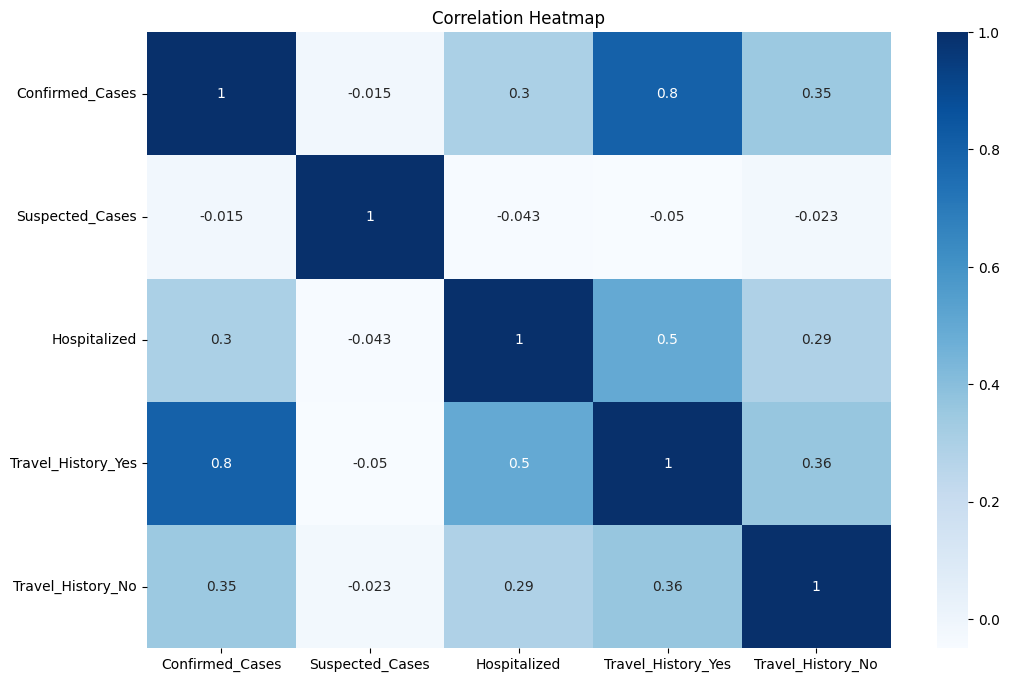

In [12]:
plt.figure(figsize=(12,8));
sns.heatmap(df.corr(),annot=True,cmap='Blues');
plt.title('Correlation Heatmap');

In [13]:
def corr_scatter(col1=None,col2=None,dataframe=None):
    plt.figure(figsize=(12,8));
    sns.scatterplot(x=col1,y=col2,data=dataframe);
    xlabel = ' '.join(col1.split('_'))
    ylabel = ' '.join(col2.split('_'))
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(f'{xlabel} vs {ylabel}');
    plt.show();

In [14]:
columns = df.columns.drop(['Country'])

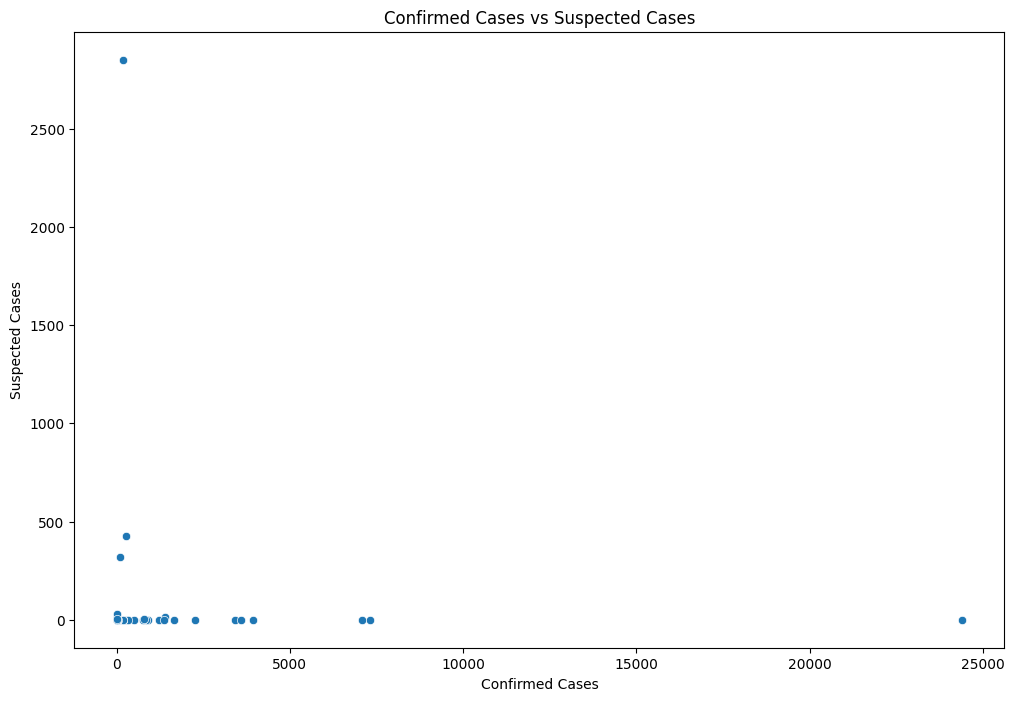

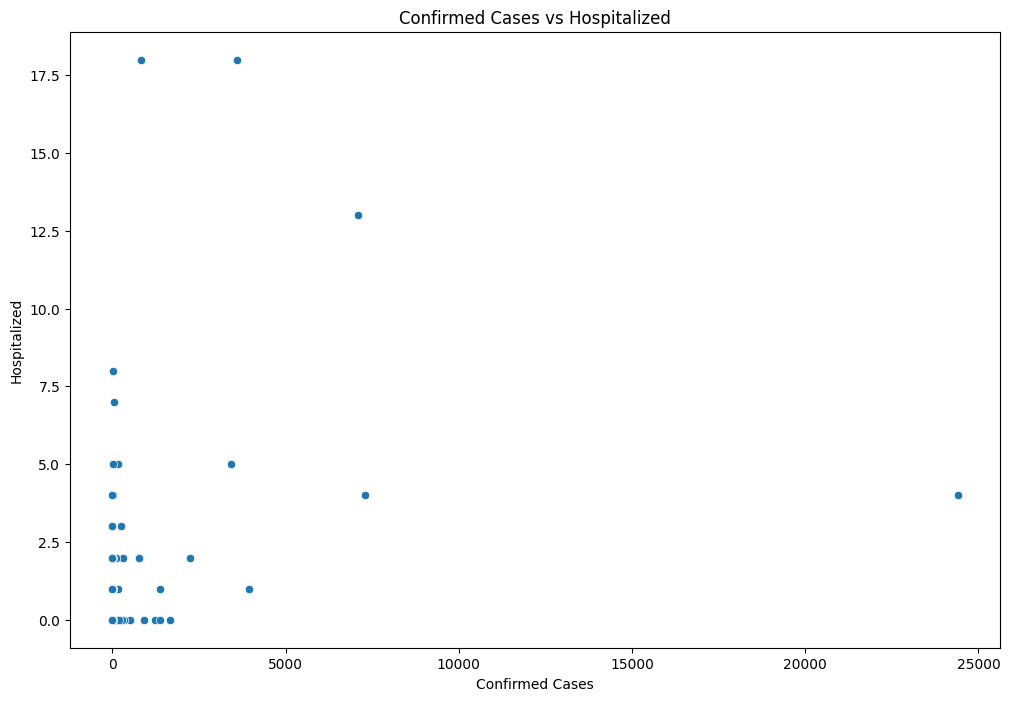

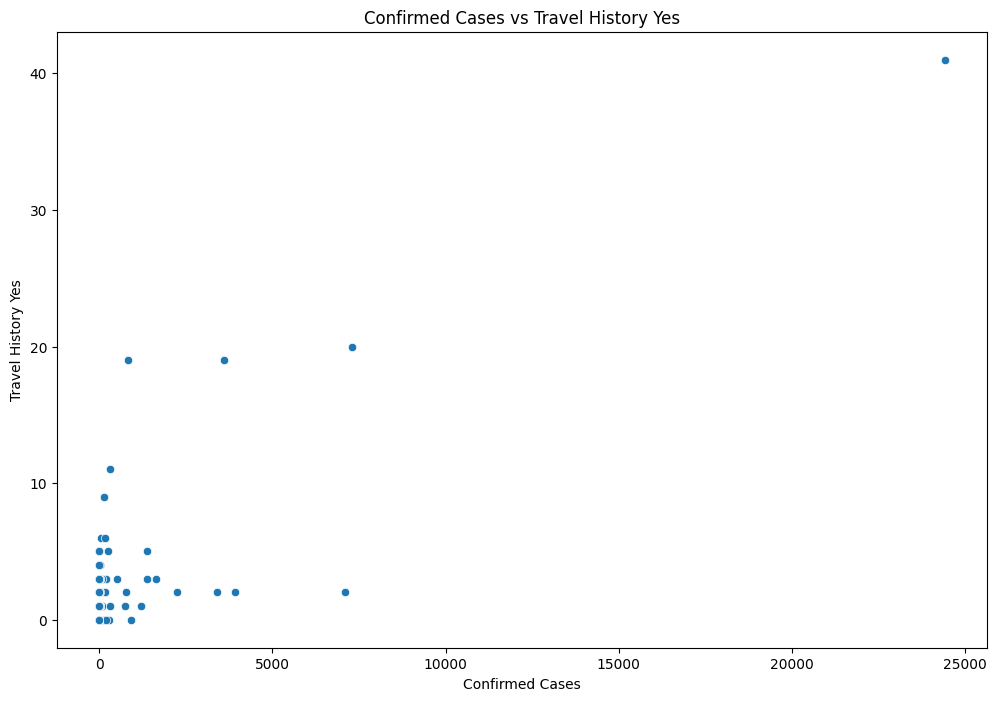

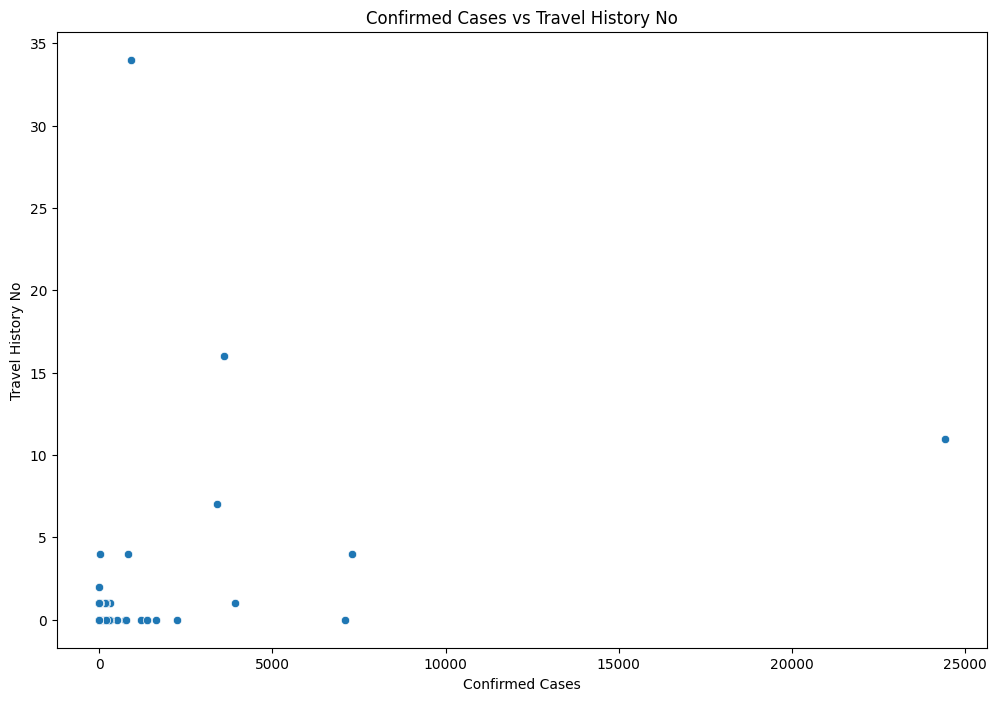

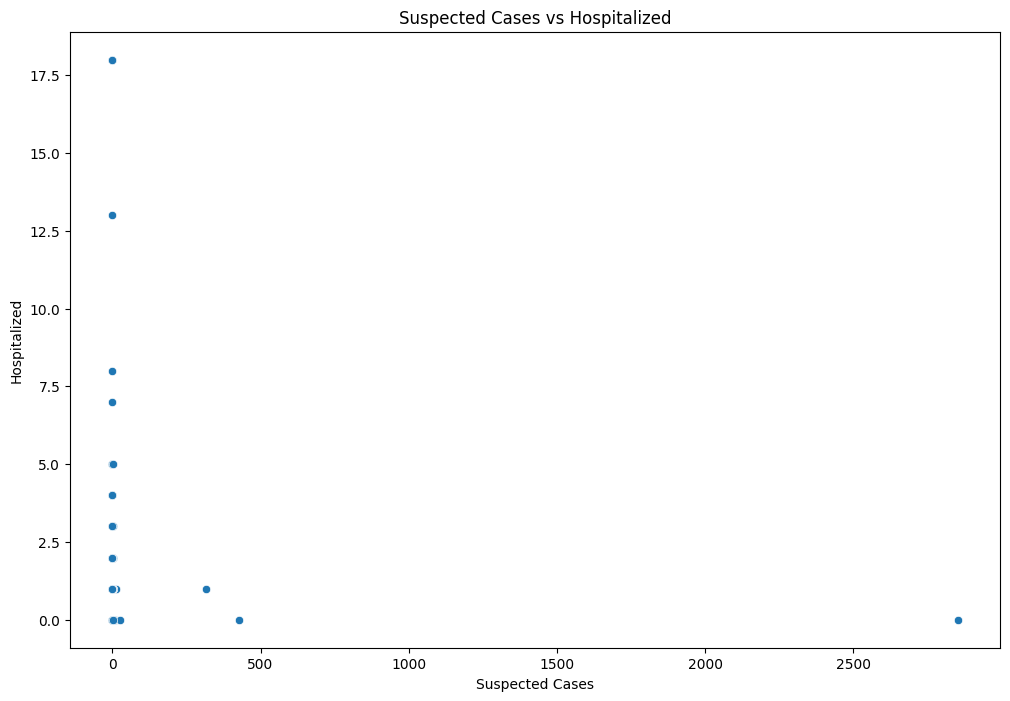

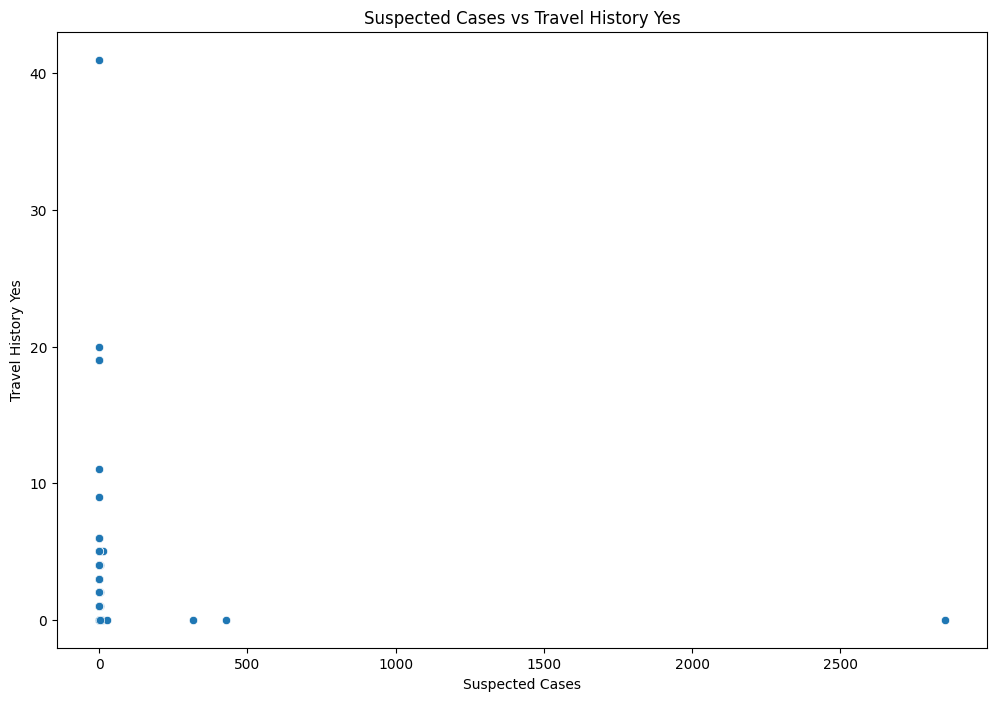

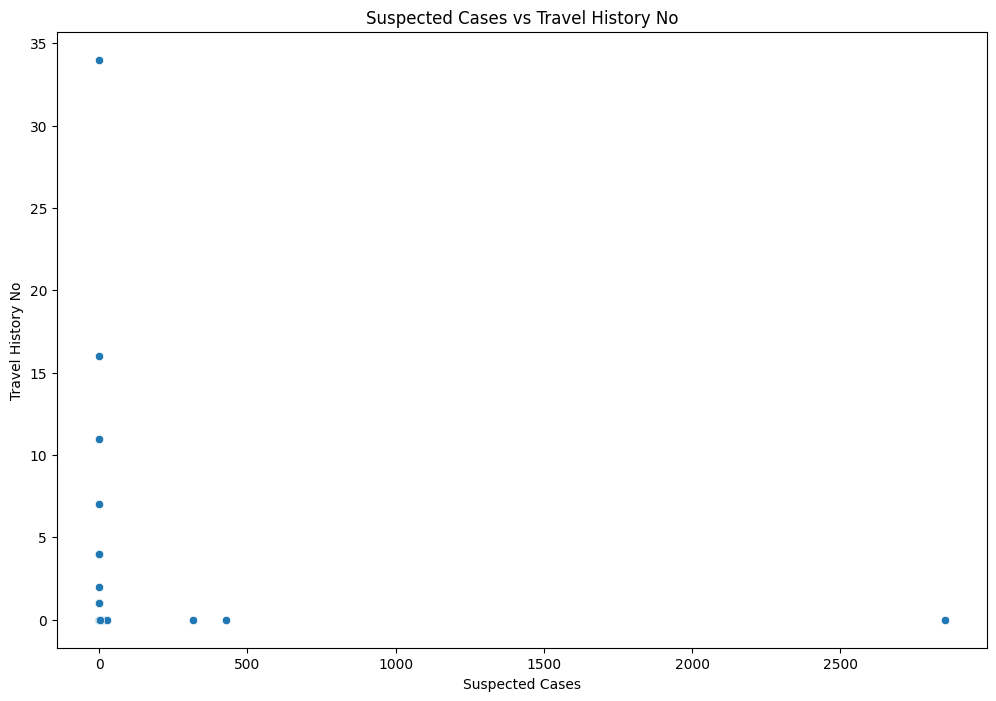

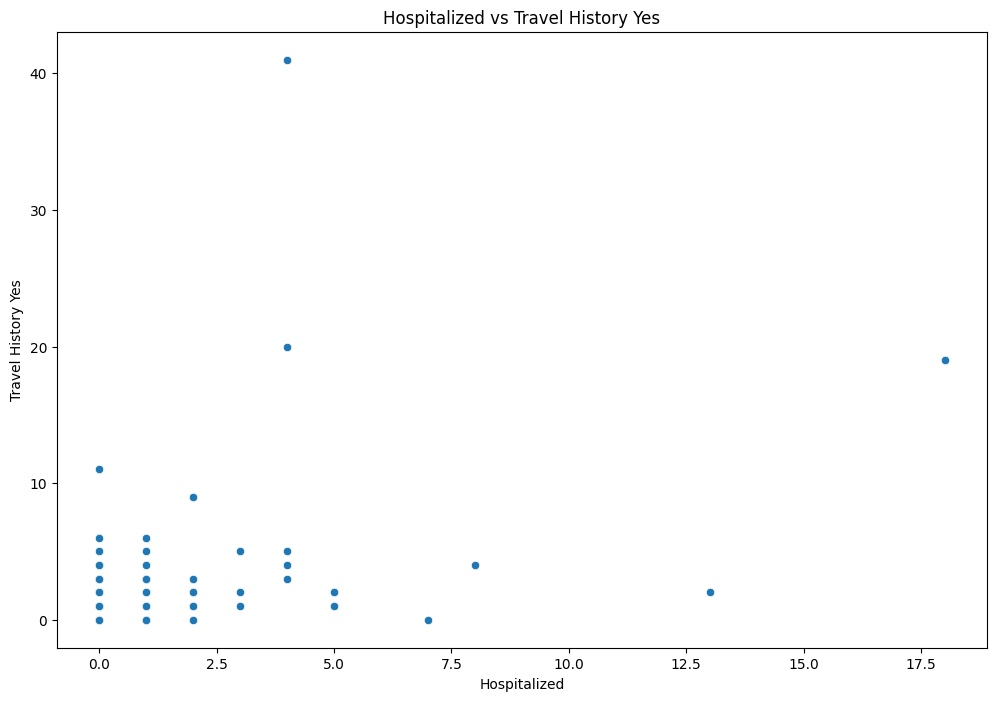

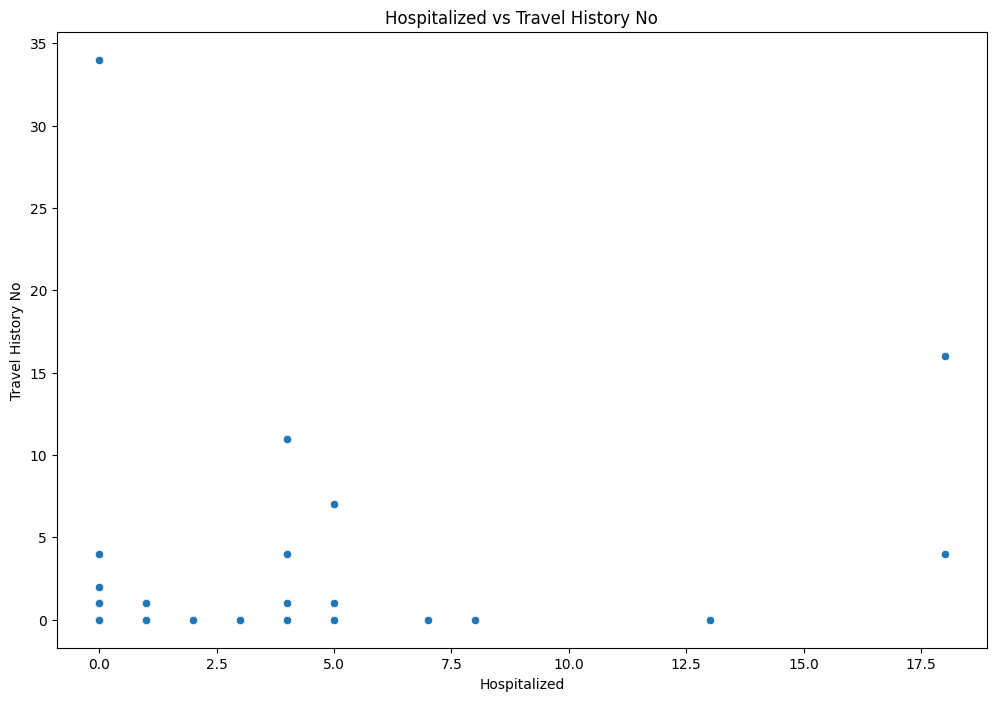

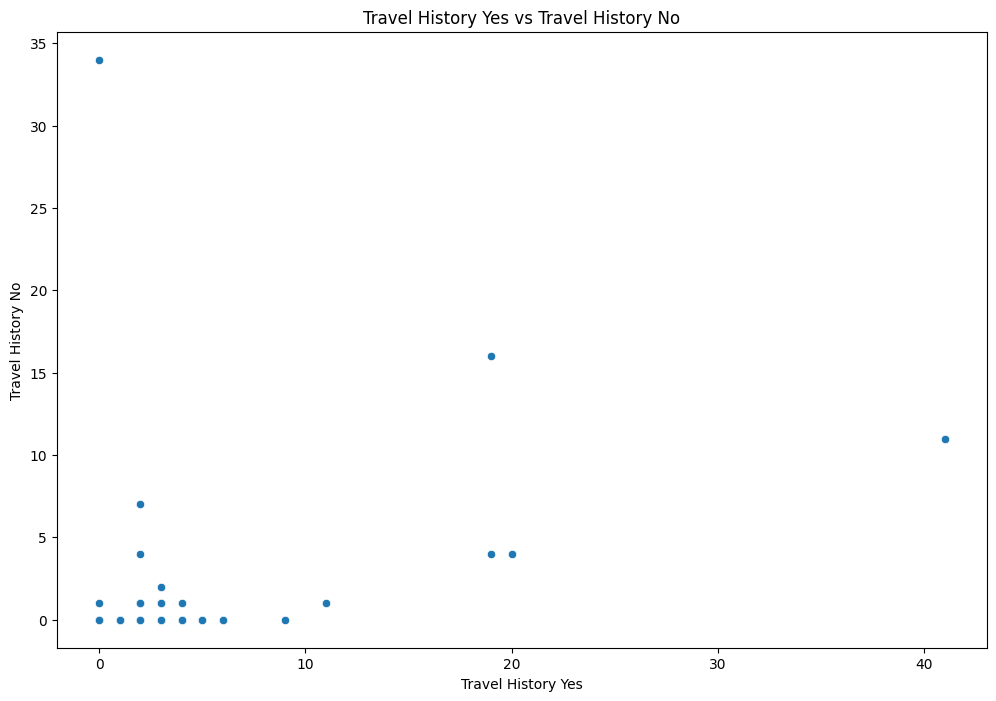

In [15]:
for col1 in columns:
    for col2 in columns.drop([col1]):
        corr_scatter(col1=col1,col2=col2,dataframe=df);
    columns = columns.drop([col1])

In [16]:
pair_df = df.drop(['Country'],axis=1)

<Figure size 2000x1000 with 0 Axes>

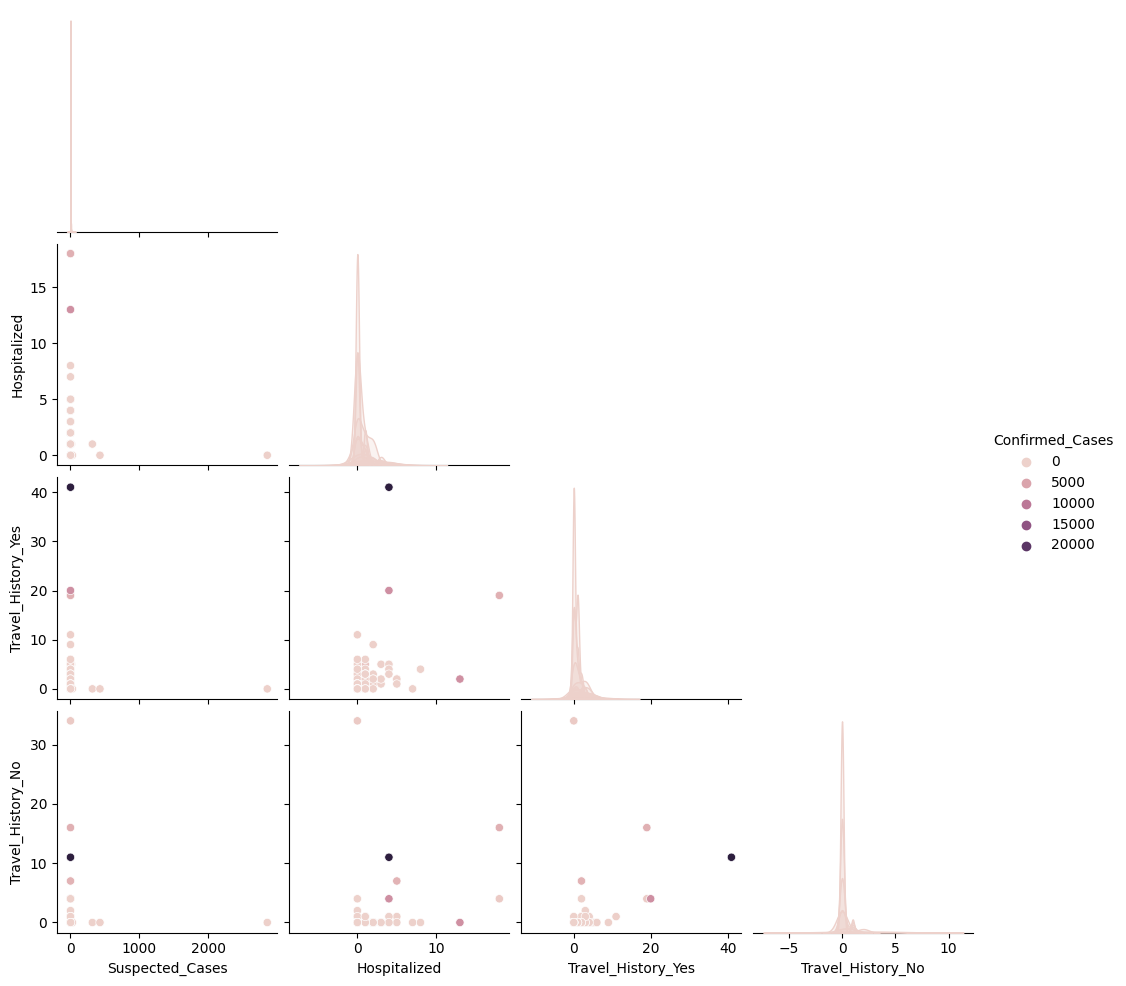

In [17]:
plt.figure(figsize=(20,10));
sns.pairplot(pair_df,corner=True,hue='Confirmed_Cases');

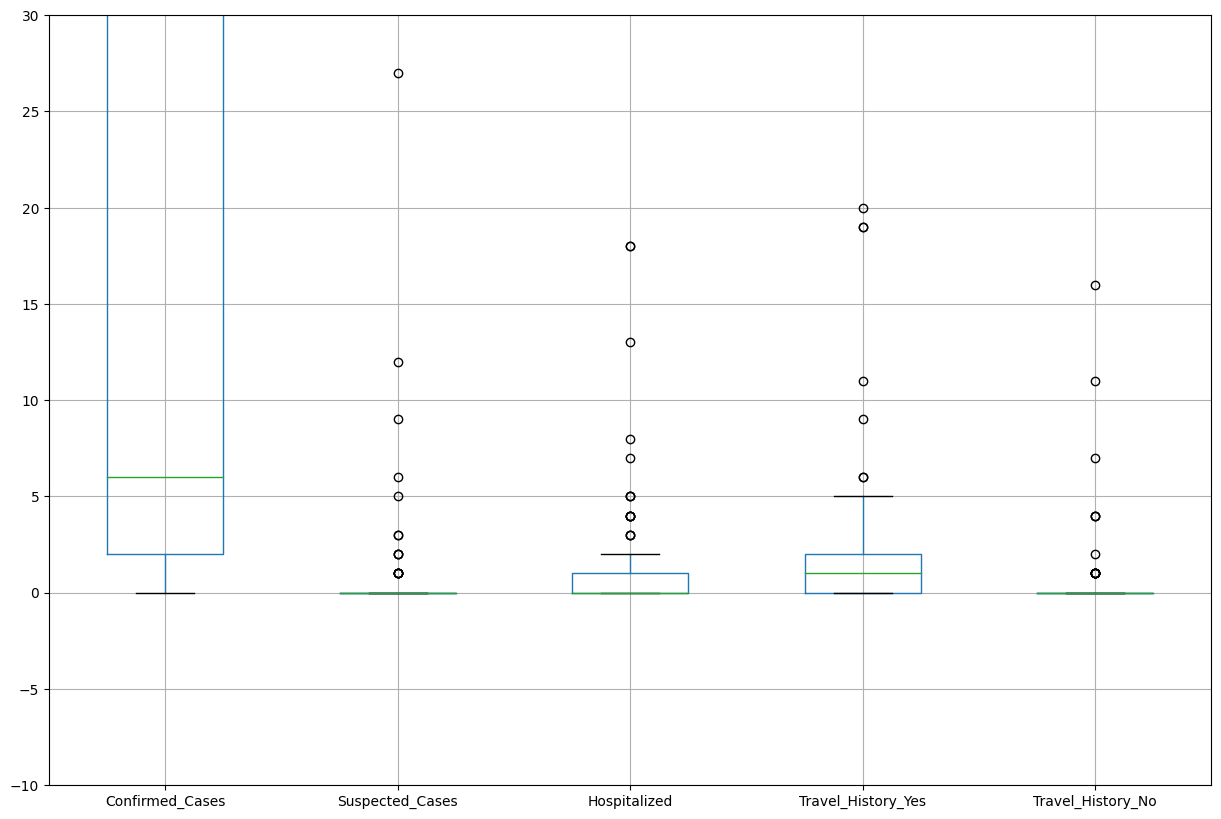

In [18]:
pair_df.boxplot(figsize=(15,10));
plt.ylim(-10,30);

In [19]:
columns = df.columns.drop(['Country'])

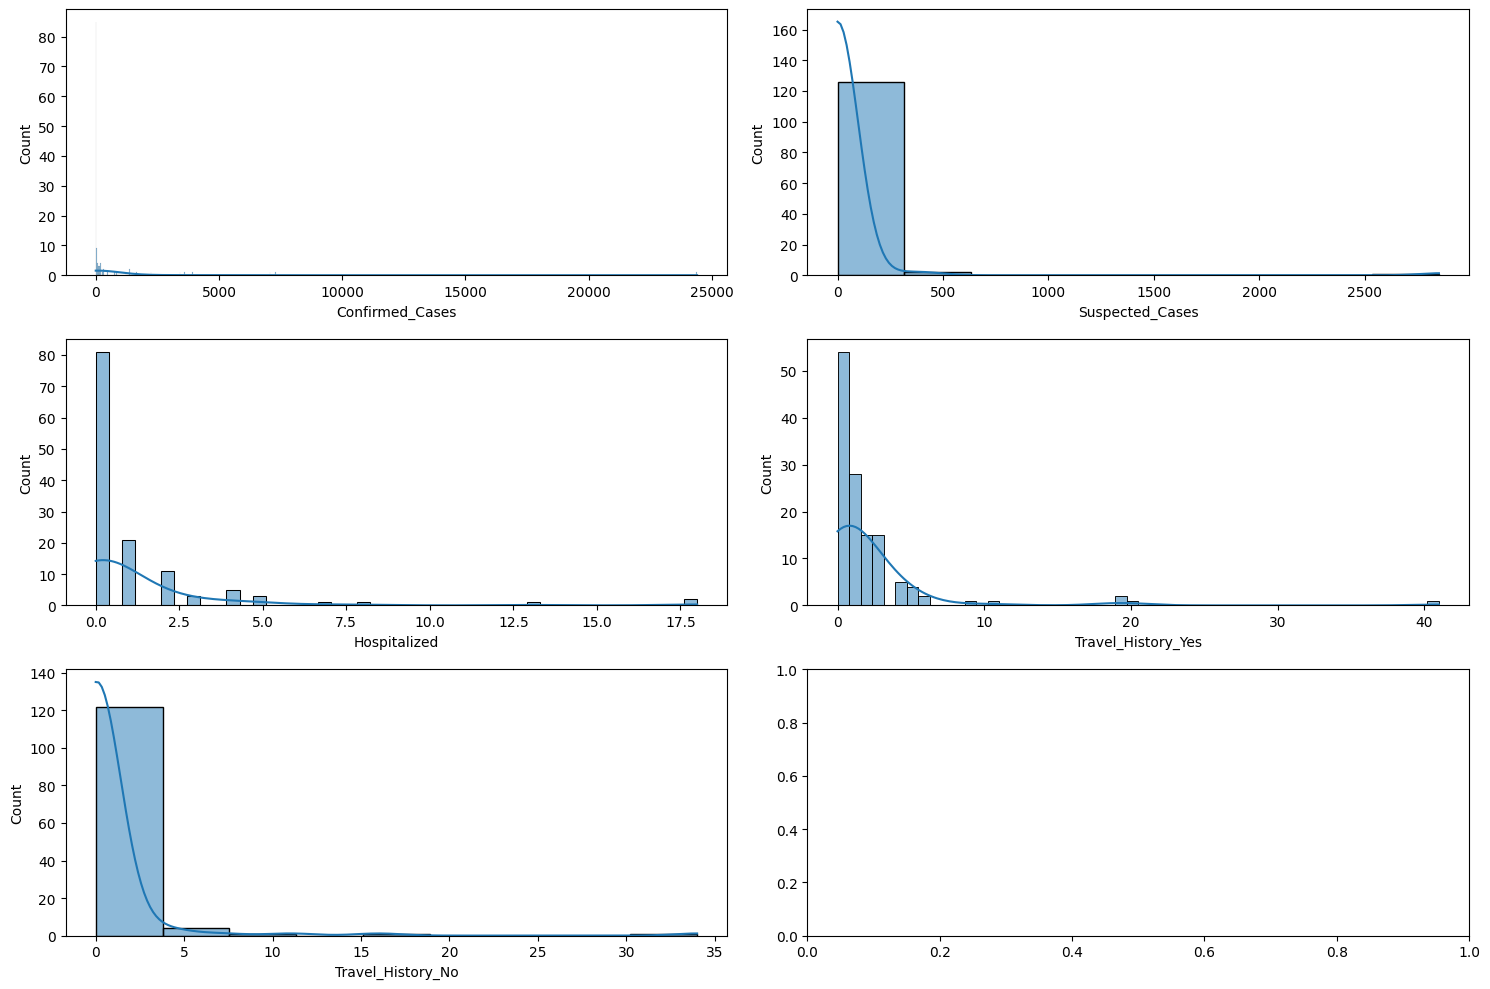

In [20]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
for name, ax in zip(columns, axes.flatten()):
    sns.histplot(x=name,kde=True, data=df, ax=ax)

plt.tight_layout()

In [21]:
X = df.drop(['Country','Confirmed_Cases'],axis=1)
y=df['Confirmed_Cases']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [23]:
scaler = preprocessing.StandardScaler()

In [24]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [25]:
normalized_x_train.head()

,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,-0.124958,2.711188,0.371794,-0.189668
1,-0.124958,-0.435317,-0.434411,-0.189668
2,-0.124958,-0.435317,-0.232860,-0.189668
3,-0.124958,1.531248,-0.031309,1.763910
4,-0.124958,0.744622,0.573345,-0.189668


In [34]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

In [35]:
d={}
def metric_scores(actual,predicted,name):

    """
    Function To evaluate and store the evaluation metric scores .
    Arguments to be passed:
    1. y_test
    2. y_pred
    3. name of the model
    """
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    d[name]=[mae,mse,mape,r2]

    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

In [36]:
def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression'):

    """
    A function to make predictions, evaluate the model and plot the regression line!!!
    The function requires the following values:
    1. x_test
    2. y_test
    3. model object
    4. Name of the model
    """

    predicted = model.predict(x_test)
    actual=y_test

    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c='hotpink')

    p1 = max(max(predicted), max(actual))
    p2 = min(min(predicted), min(actual))
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(normalized_x_train,y_train)

LinearRegression()

Mean Absolute Error is 675.932

Mean Squared Error is 1277093.813

Mean Absolute Percentage Error is 198342613389775488.000

R Squared Error is -0.833



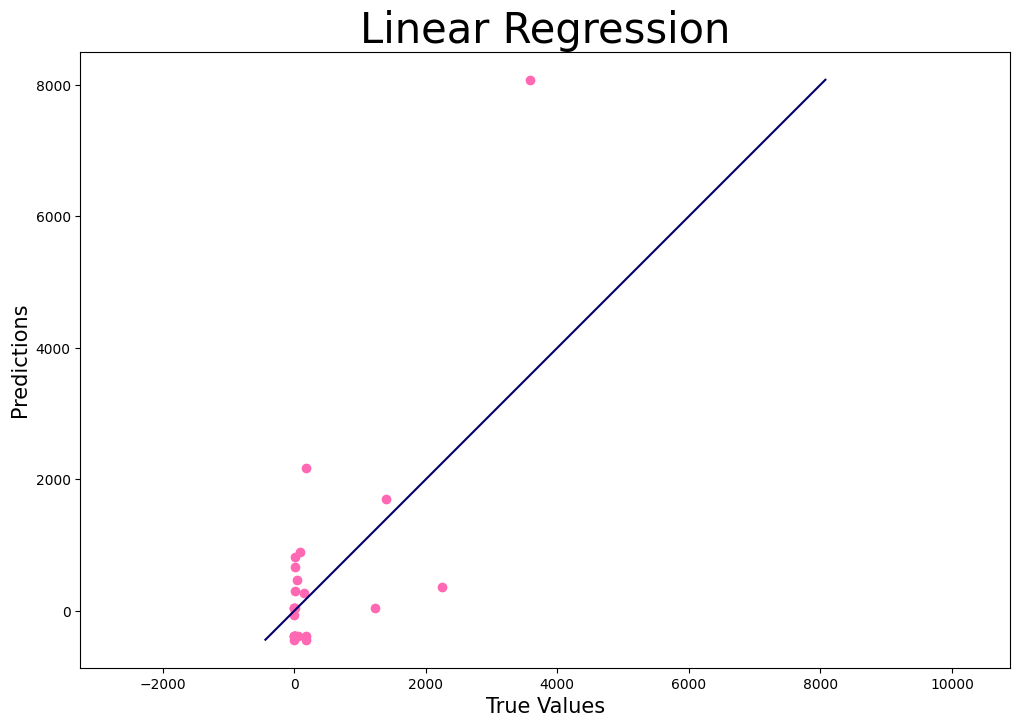

In [39]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=lr,name='Linear Regression')

In [40]:
results = pd.DataFrame(d,index = ['MAE','MSE','MAPE','R2'])

In [41]:
results

,Linear Regression
MAE,6.759316e+02
MSE,1.277094e+06
MAPE,1.983426e+17
R2,-8.327027e-01
